# 📊 ***Data Science, CA3 - Task 1*** 📚

* **Member 1** : [Kasra Kashani, 810101490] 🆔
* **Member 2** : [Borna Foroohari, 810101480] 🆔

📄 **Subjects**: Machine Learning: Classification

## 🔹**Imports**

Import required modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression

## 📍 Cancer Patient Survival Prediction

In this task, our goal is to build a *binary classification model* that predicts whether a cancer patient is `Alive` or `Deceased` based on their personal details and medical information.

### 🧠 Feature Understanding & Analysis

Below is a breakdown of all major features in the dataset, including their types, meanings, and the potential insights they provide for predicting cancer survival:

| 🏷️ Feature Name         | 🧬 Type      | 💡 Description                                                                 | 🔍 Key Insight                                                                 |
|-------------------------|-------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| `id`               | numeric    | Unique identifier for each record (starting from 1)                         | Uniquily specify each record
| `Birth_Date`            | Date        | Date of birth of the patient                                                   | Will be used to calculate **Age** at diagnosis — younger patients may survive longer |
| `Diagnosis_Date`        | Date        | Date when cancer was diagnosed                                                 | Combined with `Birth_Date` to compute **Age**, and with `Surgery_Date` to compute **Delay** |
| `Surgery_Date`          | Date        | Date of surgery                                                                | Helps measure treatment delay (i.e., `Days_To_Surgery`)                        |
| `Weight` / `Height`     | Numeric     | Physical measurements in kg and cm                                             | Can be used to calculate **BMI** — poor nutrition may affect survival          |
| `Urban_Rural`           | Categorical | Whether patient lives in an urban or rural area                                | Patients in rural areas may face limited treatment access                      |
| `Occupation`            | Categorical | The patient's profession                                                       | Some occupations may indicate higher risk due to stress or exposure            |
| `Insurance_Type`        | Categorical | Type of health insurance                                                       | Better insurance may allow for better treatment                                |
| `Family_History`        | Binary      | 1 = Family history of cancer                                                   | May indicate earlier screening and awareness                                   |
| `Cancer_Type`           | Categorical | Specific type of cancer diagnosed                                              | A key predictor — some types are more aggressive than others                   |
| `Stage_at_Diagnosis`    | Categorical | Stage of cancer at the time of diagnosis                                       | Crucial — higher stages mean worse prognosis                                  |
| `Symptoms`              | Text        | Patient’s reported symptoms                                                    | Can extract features like **word count** or **presence of critical symptoms**   |
| `Tumor_Size`            | Numeric     | Tumor size in centimeters                                                      | Larger tumors may reduce survival chances                                      |
| `Radiation_Sessions`    | Numeric     | Number of radiation therapy sessions                                           | May correlate with cancer severity                                             |
| `Immunotherapy`         | Binary      | 1 = Patient received immunotherapy                                             | May improve survival, especially for advanced cancers                          |
| `Targeted_Therapy`      | Binary      | 1 = Patient received targeted therapy                                          | Indicates specialized treatment — may be linked to better outcome              |
| `Recurrence_Status`     | Binary      | 1 = Cancer returned after treatment                                            | Strong negative indicator for survival                                         |
| `Smoking_History`       | Binary      | 1 = Smoker                                                                     | Major negative health factor — affects multiple cancers                        |
| `Alcohol_Use`           | Binary      | 1 = Uses alcohol                                                               | Another risk factor — may lower treatment success                              |
| `Chemotherapy_Drugs`    | Multi-Cat   | List of chemo drugs (comma-separated)                                          | We can extract **count**, or apply **multi-hot encoding**                      |
| `label` (Target)        | Binary      | 1 = Alive, 0 = Deceased                                                        | Target for classification — binary outcome                                     |

First we read and load the train dataset into a Pandas dataframe.

In [2]:
# Load the CSV file into a dataframe
df = pd.read_csv("train_data.csv")

In [3]:
# Show the dataframe
df

,id,Birth_Date,Weight,Height,Urban_Rural,Occupation,Insurance_Type,Family_History,Cancer_Type,Stage_at_Diagnosis,...,Tumor_Size,Surgery_Date,Chemotherapy_Drugs,Radiation_Sessions,Immunotherapy,Targeted_Therapy,Recurrence_Status,Smoking_History,Alcohol_Use,label
0,1,1994-07-01,64.9,155.0cm,Urban,Unemployed,UEBMI,No,Breast,II,...,8.0,2024-10-19,"Paclitaxel,Docetaxel,Doxorubicin",16,No,Yes,NO,Never,Regular,1
1,2,1992-07-16,61.4,171.0cm,Urban,Factory Worker,UEBMI,Yes,Breast,I,...,10.0,2021-02-28,"Cyclophosphamide,Paclitaxel,Doxorubicin,Docetaxel",10,No,No,Yes,Former,Regular,1
2,3,1948-06-23,60.7,170.0cm,Rural,Unemployed,NRCMS,No,Stomach,IV,...,13.0,2022-09-25,"Fluorouracil,Cisplatin",21,Yes,No,NO,Former,Never,0
3,4,1954-11-26,70.2,171.0cm,Urban,Farmer,URBMI,Yes,Cervical,IV,...,3.0,2024-09-13,Cisplatin,10,No,Yes,NO,Never,Regular,1
4,5,1979-07-08,100.3,186.0cm,Rural,Office Worker,Self-pay,Yes,Lung,II,...,12.0,2023-12-08,"Gemcitabine,Carboplatin",6,Yes,No,Yes,Former,Never,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,1969-10-07,55.4,173.0cm,Urban,Farmer,URBMI,No,Stomach,I,...,11.0,NaN,"Cisplatin, Paclitaxel",16,No,No,Yes,Never,Never,0
26469,26470,1986-12-12,58.4,174.0cm,Urban,Unemployed,NRCMS,No,Liver,IV,...,5.9,NaN,"Gemcitabine, Carboplatin",7,Yes,No,NO,Never,Never,1
26470,26471,1947-12-02,58.3,194.0cm,Urban,Farmer,UEBMI,No,Liver,I,...,7.5,NaN,"Cisplatin, Paclitaxel",2,No,No,Yes,Former,Never,1
26471,26472,1958-03-03,65.0,167.0cm,Rural,Office Worker,UEBMI,Yes,Colorectal,III,...,3.9,NaN,NaN,14,No,No,Yes,Never,Never,0


In [4]:
# Convert the date columns to datetime format
df["Birth_Date"] = pd.to_datetime(df["Birth_Date"], errors='coerce')
df["Diagnosis_Date"] = pd.to_datetime(df["Diagnosis_Date"], errors='coerce')
df["Surgery_Date"] = pd.to_datetime(df["Surgery_Date"], errors='coerce')

We can see that 4 columns `Symptoms`, `Surgery_Date`, `Chemotherapy_Drugs` and `Birth_Date` have null values and we should handle their missing data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  26473 non-null  int64         
 1   Birth_Date          26386 non-null  datetime64[ns]
 2   Weight              26473 non-null  float64       
 3   Height              26473 non-null  object        
 4   Urban_Rural         26473 non-null  object        
 5   Occupation          26473 non-null  object        
 6   Insurance_Type      26473 non-null  object        
 7   Family_History      26473 non-null  object        
 8   Cancer_Type         26473 non-null  object        
 9   Stage_at_Diagnosis  26473 non-null  object        
 10  Diagnosis_Date      26473 non-null  datetime64[ns]
 11  Symptoms            25972 non-null  object        
 12  Tumor_Size          26473 non-null  float64       
 13  Surgery_Date        18898 non-null  datetime64

We will handle their null values as below:

- `Birth_Date` -> Fill NaN values with an outlier value like 1700-01-01.

- `Symptoms` -> Replcae null values with an empty string, because the patient doesn't have any symptom.

- `Chemotherapy_Drugs` -> Replcae null values with an empty string, because the patient doesn't consume any drug.

- `Surgery_Date` -> Add a new column `Had_Surgery` indicates that the patient has done surgery or not, and if so, save their date.

In [6]:
# Fill NaN values in the "Birth_Date" column with an outlier value
df["Birth_Date"] = df["Birth_Date"].fillna(pd.Timestamp("1700-01-01"))
df["Birth_Date"] = pd.to_datetime(df["Birth_Date"], errors='coerce')

# Fill NaN values in the "Symptoms" column with an empty string
df["Symptoms"] = df["Symptoms"].fillna("")

# Fill NaN values in the "Chemotherapy_Drugs" column with an empty string
df["Chemotherapy_Drugs"] = df["Chemotherapy_Drugs"].fillna("")

Before handling missing values for the `Surgery_Date` column, we construct 3 new fatures based on our date columns, named `Weeks_Diagnosis_To_Surgery`, `Surgery_Year` and `Age_At_Diagnosis`.

In [7]:
# Create a new column and calculate the weeks from diagnosis to surgery
df["Weeks_Diagnosis_To_Surgery"] = np.where(
    df["Surgery_Date"].notna(),
    (df["Surgery_Date"] - df["Diagnosis_Date"]).dt.days // 7,
    -1 
).astype(int)

# Create a new column and calculate the year from of surgery
df["Surgery_Year"] = np.where(
    df["Surgery_Date"].notna(),
    df["Surgery_Date"].dt.year,
    -1 
).astype(int)

# Create a new column and calculate the age at diagnosis
df["Age_At_Diagnosis"] = -1
df.loc[(df["Birth_Date"].dt.year != 1700), "Age_At_Diagnosis"] = (
    (df.loc[(df["Birth_Date"].dt.year != 1700), "Diagnosis_Date"] - df.loc[(df["Birth_Date"].dt.year != 1700), "Birth_Date"]).dt.days // 365
)

# Delete the "Surgery_Date" column
df = df.drop(columns=["Surgery_Date"])

# Create a new column to indicate if the patient had surgery
df["Had_Surgery"] = (df["Weeks_Diagnosis_To_Surgery"] != -1).astype(int)

After that, we don't need `Birth_Date` and `Diagnosis_Date` columns anymore. Then we can see that we don't have any missing or null values.

In [8]:
# Delete the "Birth_Date" and "Diagnosis_Date" columns
df = df.drop(columns=["Birth_Date"])
df = df.drop(columns=["Diagnosis_Date"])

In [9]:
# Show the dataframe
df

,id,Weight,Height,Urban_Rural,Occupation,Insurance_Type,Family_History,Cancer_Type,Stage_at_Diagnosis,Symptoms,...,Immunotherapy,Targeted_Therapy,Recurrence_Status,Smoking_History,Alcohol_Use,label,Weeks_Diagnosis_To_Surgery,Surgery_Year,Age_At_Diagnosis,Had_Surgery
0,1,64.9,155.0cm,Urban,Unemployed,UEBMI,No,Breast,II,"Cough, Weight Loss",...,No,Yes,NO,Never,Regular,1,244,2024,25,1
1,2,61.4,171.0cm,Urban,Factory Worker,UEBMI,Yes,Breast,I,Blood in Stool,...,No,No,Yes,Former,Regular,1,341,2021,22,1
2,3,60.7,170.0cm,Rural,Unemployed,NRCMS,No,Stomach,IV,"Nausea, Vomiting",...,Yes,No,NO,Former,Never,0,417,2022,66,1
3,4,70.2,171.0cm,Urban,Farmer,URBMI,Yes,Cervical,IV,"Nausea, Vomiting",...,No,Yes,NO,Never,Regular,1,192,2024,66,1
4,5,100.3,186.0cm,Rural,Office Worker,Self-pay,Yes,Lung,II,"Cough, Weight Loss",...,Yes,No,Yes,Former,Never,0,228,2023,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,55.4,173.0cm,Urban,Farmer,URBMI,No,Stomach,I,"Cough, Weight Loss",...,No,No,Yes,Never,Never,0,-1,-1,46,0
26469,26470,58.4,174.0cm,Urban,Unemployed,NRCMS,No,Liver,IV,Blood in Stool,...,Yes,No,NO,Never,Never,1,-1,-1,27,0
26470,26471,58.3,194.0cm,Urban,Farmer,UEBMI,No,Liver,I,"Fatigue, Pain",...,No,No,Yes,Former,Never,1,-1,-1,72,0
26471,26472,65.0,167.0cm,Rural,Office Worker,UEBMI,Yes,Colorectal,III,"Fatigue, Pain",...,No,No,Yes,Never,Never,0,-1,-1,54,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          26473 non-null  int64  
 1   Weight                      26473 non-null  float64
 2   Height                      26473 non-null  object 
 3   Urban_Rural                 26473 non-null  object 
 4   Occupation                  26473 non-null  object 
 5   Insurance_Type              26473 non-null  object 
 6   Family_History              26473 non-null  object 
 7   Cancer_Type                 26473 non-null  object 
 8   Stage_at_Diagnosis          26473 non-null  object 
 9   Symptoms                    26473 non-null  object 
 10  Tumor_Size                  26473 non-null  float64
 11  Chemotherapy_Drugs          26473 non-null  object 
 12  Radiation_Sessions          26473 non-null  int64  
 13  Immunotherapy               264

Now we encode categorical features.

In [11]:
# First see the count of unique values for each column
for col in df.columns:
    print(f"{col} -> {df[col].unique().size}")

# Show the unique values in the "Smoking_History" column
print(f"\nSmoking_History: {df["Smoking_History"].unique()}")

# Show the unique values in the "Alcohol_Use" column
print(f"\nAlcohol_Use: {df["Alcohol_Use"].unique()}")

# Show the unique values in the "Stage_at_Diagnosis" column
print(f"\nStage_at_Diagnosis: {df["Stage_at_Diagnosis"].unique()}")

# Show the unique values in the "Occupation" column
print(f"\nOccupation: {df["Occupation"].unique()}")

id -> 26473
Weight -> 938
Height -> 46
Urban_Rural -> 2
Occupation -> 5
Insurance_Type -> 4
Family_History -> 2
Cancer_Type -> 7
Stage_at_Diagnosis -> 4
Symptoms -> 6
Tumor_Size -> 146
Chemotherapy_Drugs -> 155
Radiation_Sessions -> 30
Immunotherapy -> 2
Targeted_Therapy -> 2
Recurrence_Status -> 2
Smoking_History -> 3
Alcohol_Use -> 3
label -> 2
Weeks_Diagnosis_To_Surgery -> 1340
Surgery_Year -> 16
Age_At_Diagnosis -> 88
Had_Surgery -> 2

Smoking_History: ['Never' 'Former' 'Current']

Alcohol_Use: ['Regular' 'Never' 'Occasional']

Stage_at_Diagnosis: ['II' 'I' 'IV' 'III']

Occupation: ['Unemployed' 'Factory Worker' 'Farmer' 'Office Worker' 'Retired']


In [12]:
# Create a new column for patient's social group before encoding
df["Social_Group"] = df["Occupation"] + "_" + df["Insurance_Type"] + "_" + df["Urban_Rural"]

# Encode binary and ordinal categorical columns manually
df["Urban_Rural"] = df["Urban_Rural"].map({"Urban": 0, "Rural": 1})
df["Family_History"] = df["Family_History"].map({"No": 0, "Yes": 1})
df["Immunotherapy"] = df["Immunotherapy"].map({"No": 0, "Yes": 1})
df["Targeted_Therapy"] = df["Targeted_Therapy"].map({"No": 0, "Yes": 1})
df["Recurrence_Status"] = df["Recurrence_Status"].map({"NO": 0, "Yes": 1})

df["Smoking_History"] = df["Smoking_History"].map({"Never": 0, "Former": 1, "Current": 2})
df["Alcohol_Use"] = df["Alcohol_Use"].map({"Never": 0, "Occasional": 1, "Regular": 2})

df["Stage_at_Diagnosis"] = df["Stage_at_Diagnosis"].map({"I": 1, "II": 2, "III": 3, "IV": 4})

df["Occupation"] = df["Occupation"].map({"Unemployed": 0, "Retired": 1, "Farmer": 2, "Factory Worker": 3, "Office Worker": 4})

In [13]:
# Endcode other categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=["Insurance_Type", "Cancer_Type", "Symptoms", "Social_Group"])
df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype(int)

# Drop the emplty Symptoms column
df = df.drop(columns=["Symptoms_"])

Also, we extract all unique drugs from the `Chemotherapy_Drugs` column for its one-hot encoding.

In [14]:
all_drugs = set()

# Extract all unique drugs from the "Chemotherapy_Drugs" column
for entry in df["Chemotherapy_Drugs"]:
    drugs = [d.strip() for d in entry.split(",") if d.strip()]
    all_drugs.update(drugs)

# Sort the unique drugs
all_drugs = sorted(all_drugs)

print(f"Total unique drugs: {len(all_drugs)}")

# Create new columns for each drug and set their values based on the presence of the drug in the "Chemotherapy_Drugs" column
for drug in all_drugs:
    df[f"Drug_{drug}"] = df["Chemotherapy_Drugs"].apply(lambda x: int(drug in x))

# Drop the original "Chemotherapy_Drugs" column
df = df.drop(columns=["Chemotherapy_Drugs"])

Total unique drugs: 12


In [15]:
# Show the dataframe
df

,id,Weight,Height,Urban_Rural,Occupation,Family_History,Stage_at_Diagnosis,Tumor_Size,Radiation_Sessions,Immunotherapy,...,Drug_Cyclophosphamide,Drug_Docetaxel,Drug_Doxorubicin,Drug_Fluorouracil,Drug_Gemcitabine,Drug_Irinotecan,Drug_Leucovorin,Drug_Oxaliplatin,Drug_Paclitaxel,Drug_Sorafenib
0,1,64.9,155.0cm,0,0,0,2,8.0,16,0,...,0,1,1,0,0,0,0,0,1,0
1,2,61.4,171.0cm,0,3,1,1,10.0,10,0,...,1,1,1,0,0,0,0,0,1,0
2,3,60.7,170.0cm,1,0,0,4,13.0,21,1,...,0,0,0,1,0,0,0,0,0,0
3,4,70.2,171.0cm,0,2,1,4,3.0,10,0,...,0,0,0,0,0,0,0,0,0,0
4,5,100.3,186.0cm,1,4,1,2,12.0,6,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,55.4,173.0cm,0,2,0,1,11.0,16,0,...,0,0,0,0,0,0,0,0,1,0
26469,26470,58.4,174.0cm,0,0,0,4,5.9,7,1,...,0,0,0,0,1,0,0,0,0,0
26470,26471,58.3,194.0cm,0,2,0,1,7.5,2,0,...,0,0,0,0,0,0,0,0,1,0
26471,26472,65.0,167.0cm,1,4,1,3,3.9,14,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          26473 non-null  int64  
 1   Weight                                      26473 non-null  float64
 2   Height                                      26473 non-null  object 
 3   Urban_Rural                                 26473 non-null  int64  
 4   Occupation                                  26473 non-null  int64  
 5   Family_History                              26473 non-null  int64  
 6   Stage_at_Diagnosis                          26473 non-null  int64  
 7   Tumor_Size                                  26473 non-null  float64
 8   Radiation_Sessions                          26473 non-null  int64  
 9   Immunotherapy                               26473 non-null  int64  
 10  Targeted_T

Now it's time to clean numeric features, such as `Weight` and `Height`. Also we extract the `BMI` feature from these 2 columns for each patient.

In [17]:
# Delete the additional word 'cm' in the "Height" column
df["Height"] = df["Height"].str.replace("cm", "").str.strip().astype(float)

# Compute the BMI
df["BMI"] = (df["Weight"] / ((df["Height"] / 100) ** 2)).round(1)

# Make "Height" and "Weight" columns to int type
df["Height"] = df["Height"].astype(int)
df["Weight"] = df["Weight"].astype(int)

In [18]:
# Show the dataframe
df

,id,Weight,Height,Urban_Rural,Occupation,Family_History,Stage_at_Diagnosis,Tumor_Size,Radiation_Sessions,Immunotherapy,...,Drug_Docetaxel,Drug_Doxorubicin,Drug_Fluorouracil,Drug_Gemcitabine,Drug_Irinotecan,Drug_Leucovorin,Drug_Oxaliplatin,Drug_Paclitaxel,Drug_Sorafenib,BMI
0,1,64,155,0,0,0,2,8.0,16,0,...,1,1,0,0,0,0,0,1,0,27.0
1,2,61,171,0,3,1,1,10.0,10,0,...,1,1,0,0,0,0,0,1,0,21.0
2,3,60,170,1,0,0,4,13.0,21,1,...,0,0,1,0,0,0,0,0,0,21.0
3,4,70,171,0,2,1,4,3.0,10,0,...,0,0,0,0,0,0,0,0,0,24.0
4,5,100,186,1,4,1,2,12.0,6,1,...,0,0,0,1,0,0,0,0,0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,55,173,0,2,0,1,11.0,16,0,...,0,0,0,0,0,0,0,1,0,18.5
26469,26470,58,174,0,0,0,4,5.9,7,1,...,0,0,0,1,0,0,0,0,0,19.3
26470,26471,58,194,0,2,0,1,7.5,2,0,...,0,0,0,0,0,0,0,1,0,15.5
26471,26472,65,167,1,4,1,3,3.9,14,0,...,0,0,0,0,0,0,0,0,0,23.3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          26473 non-null  int64  
 1   Weight                                      26473 non-null  int64  
 2   Height                                      26473 non-null  int64  
 3   Urban_Rural                                 26473 non-null  int64  
 4   Occupation                                  26473 non-null  int64  
 5   Family_History                              26473 non-null  int64  
 6   Stage_at_Diagnosis                          26473 non-null  int64  
 7   Tumor_Size                                  26473 non-null  float64
 8   Radiation_Sessions                          26473 non-null  int64  
 9   Immunotherapy                               26473 non-null  int64  
 10  Targeted_T

As missing values are handled and every column is encoded and in numeric types, we can then extracting some additional good features.

In [20]:
# Create the count of drugs each patient used
drugs = [col for col in df.columns if col.startswith("Drug_")]
df["Count_Drugs"] = df[drugs].sum(axis=1)

# Create the column for number of drugs beside fitness
df["BMI_Age_Drug_Ratio"] = np.where(
    df["Age_At_Diagnosis"] != -1,
    ((df["BMI"] / df["Age_At_Diagnosis"]) * df["Count_Drugs"]),
    -1
).astype(int)

# Create the delay to surgery beside the stage level
df["Delay_Surgery_Stage"] = np.where(
    df["Weeks_Diagnosis_To_Surgery"] != -1,
    (df["Stage_at_Diagnosis"] * df["Weeks_Diagnosis_To_Surgery"]),
    -1
)

# Create the column for interaction between BMI and count of radiation sessions
df["BMI_Radiation_Interaction"] = df["BMI"] * df["Radiation_Sessions"]

# Create the column for patient's lifestyle based on smoking and alcohol used
df["Lifestyle_Risk"] = df[["Smoking_History", "Alcohol_Use"]].sum(axis=1)

# Create the risk based on patient's history
df["High_Risk_Group"] = (
    (df["Recurrence_Status"] == 1) &
    (df["Lifestyle_Risk"] >= 2) &
    (df["Family_History"] == 1)
).astype(int)

# Create the column for patient's lifestyle based on smoking and alchohol used
df["Has_Both_Therapies"] = ((df["Immunotherapy"] == 1) & (df["Targeted_Therapy"] == 1)).astype(int)

# Create the column for age and tumor size interaction
df["Age_Tumor_Size"] = np.where(
    df["Age_At_Diagnosis"] != -1,
    (df["Age_At_Diagnosis"] * df["Tumor_Size"]),
    -1
).astype(int)

# Create the column for using related drugs for each cancer type
cancer_drug_map = {
    "Cancer_Type_Breast": [
        "Drug_Doxorubicin", "Drug_Cyclophosphamide",
        "Drug_Docetaxel", "Drug_Fluorouracil", "Drug_Paclitaxel"
    ],
    "Cancer_Type_Cervical": [
        "Drug_Cisplatin", "Drug_Paclitaxel", "Drug_Fluorouracil"
    ],
    "Cancer_Type_Colorectal": [
        "Drug_Fluorouracil", "Drug_Oxaliplatin",
        "Drug_Leucovorin", "Drug_Irinotecan"
    ],
    "Cancer_Type_Esophageal": [
        "Drug_Cisplatin", "Drug_Fluorouracil", "Drug_Docetaxel"
    ],
    "Cancer_Type_Liver": [
        "Drug_Sorafenib", "Drug_Gemcitabine"
    ],
    "Cancer_Type_Lung": [
        "Drug_Cisplatin", "Drug_Carboplatin",
        "Drug_Paclitaxel", "Drug_Docetaxel", "Drug_Gemcitabine"
    ],
    "Cancer_Type_Stomach": [
        "Drug_Cisplatin", "Drug_Fluorouracil",
        "Drug_Docetaxel", "Drug_Oxaliplatin"
    ]
}

def check_appropriate_treatment(row):
    for cancer_type, drugs in cancer_drug_map.items():
        if row[cancer_type] == 1:
            relevant_drugs_count = row[drugs].sum()
            if relevant_drugs_count == len(drugs):
                return 1
    return 0

df["Related_Drugs_Used"] = df.apply(check_appropriate_treatment, axis=1)

In [21]:
# Show the dataframe
df

,id,Weight,Height,Urban_Rural,Occupation,Family_History,Stage_at_Diagnosis,Tumor_Size,Radiation_Sessions,Immunotherapy,...,BMI,Count_Drugs,BMI_Age_Drug_Ratio,Delay_Surgery_Stage,BMI_Radiation_Interaction,Lifestyle_Risk,High_Risk_Group,Has_Both_Therapies,Age_Tumor_Size,Related_Drugs_Used
0,1,64,155,0,0,0,2,8.0,16,0,...,27.0,3,3,488,432.0,2,0,0,200,0
1,2,61,171,0,3,1,1,10.0,10,0,...,21.0,4,3,341,210.0,3,1,0,220,0
2,3,60,170,1,0,0,4,13.0,21,1,...,21.0,2,0,1668,441.0,1,0,0,858,0
3,4,70,171,0,2,1,4,3.0,10,0,...,24.0,1,0,768,240.0,2,0,0,198,0
4,5,100,186,1,4,1,2,12.0,6,1,...,29.0,2,1,456,174.0,1,0,0,480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,55,173,0,2,0,1,11.0,16,0,...,18.5,2,0,-1,296.0,0,0,0,506,0
26469,26470,58,174,0,0,0,4,5.9,7,1,...,19.3,2,1,-1,135.1,0,0,0,159,0
26470,26471,58,194,0,2,0,1,7.5,2,0,...,15.5,2,0,-1,31.0,1,0,0,540,0
26471,26472,65,167,1,4,1,3,3.9,14,0,...,23.3,0,0,-1,326.2,0,0,0,210,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 97 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          26473 non-null  int64  
 1   Weight                                      26473 non-null  int64  
 2   Height                                      26473 non-null  int64  
 3   Urban_Rural                                 26473 non-null  int64  
 4   Occupation                                  26473 non-null  int64  
 5   Family_History                              26473 non-null  int64  
 6   Stage_at_Diagnosis                          26473 non-null  int64  
 7   Tumor_Size                                  26473 non-null  float64
 8   Radiation_Sessions                          26473 non-null  int64  
 9   Immunotherapy                               26473 non-null  int64  
 10  Targeted_T

At this stage, we **standardize** some of our features.

In [23]:
# Specify the features to scale
features_to_scale = [
    "Tumor_Size",
    "Radiation_Sessions",
    "Weeks_Diagnosis_To_Surgery",
    "Age_At_Diagnosis",
    "BMI",
    "Count_Drugs",
    "Height",
    "Weight",
    "BMI_Age_Drug_Ratio",
    "Delay_Surgery_Stage",
    "BMI_Radiation_Interaction",
    "Age_Tumor_Size"
    ]

# Scale and standardize the features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [24]:
# Show the dataframe
df

,id,Weight,Height,Urban_Rural,Occupation,Family_History,Stage_at_Diagnosis,Tumor_Size,Radiation_Sessions,Immunotherapy,...,BMI,Count_Drugs,BMI_Age_Drug_Ratio,Delay_Surgery_Stage,BMI_Radiation_Interaction,Lifestyle_Risk,High_Risk_Group,Has_Both_Therapies,Age_Tumor_Size,Related_Drugs_Used
0,1,-0.436570,-1.314756,0,0,0,2,0.063101,0.518090,0,...,0.395892,1.190025,1.098965,0.256808,0.651644,2,0,0,-0.612263,0
1,2,-0.577013,-0.110766,0,3,1,1,0.543756,-0.257463,0,...,-0.614460,2.137842,1.098965,0.037333,-0.410403,3,1,0,-0.539288,0
2,3,-0.623828,-0.186016,1,0,0,4,1.264739,1.164384,1,...,-0.614460,0.242208,-0.475354,2.018583,0.694700,1,0,0,1.788620,0
3,4,-0.155685,-0.110766,0,2,1,4,-1.138537,-0.257463,0,...,-0.109284,-0.705609,-0.475354,0.674857,-0.266883,2,0,0,-0.619560,0
4,5,1.248745,1.017974,1,4,1,2,1.024411,-0.774499,1,...,0.732676,0.242208,0.049419,0.209032,-0.582627,1,0,0,0.409389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,26469,-0.857899,0.039732,0,2,0,1,0.784084,0.518090,0,...,-1.035439,0.242208,-0.475354,-0.473283,0.001021,0,0,0,0.504257,0
26469,26470,-0.717456,0.114982,0,0,0,4,-0.441587,-0.645240,1,...,-0.900726,0.242208,0.049419,-0.473283,-0.768724,0,0,0,-0.761862,0
26470,26471,-0.717456,1.619969,0,2,0,1,-0.057063,-1.291534,0,...,-1.540615,0.242208,-0.475354,-0.473283,-1.266738,1,0,0,0.628315,0
26471,26472,-0.389756,-0.411764,1,4,1,3,-0.922242,0.259572,0,...,-0.227158,-1.653425,-0.475354,-0.473283,0.145497,0,0,0,-0.575775,0


At the end of processing the data, we check the correlation matrix and correlated features and then, we will delete the second column and keep the first one for each pair of columns that have a correlation more than 90%.

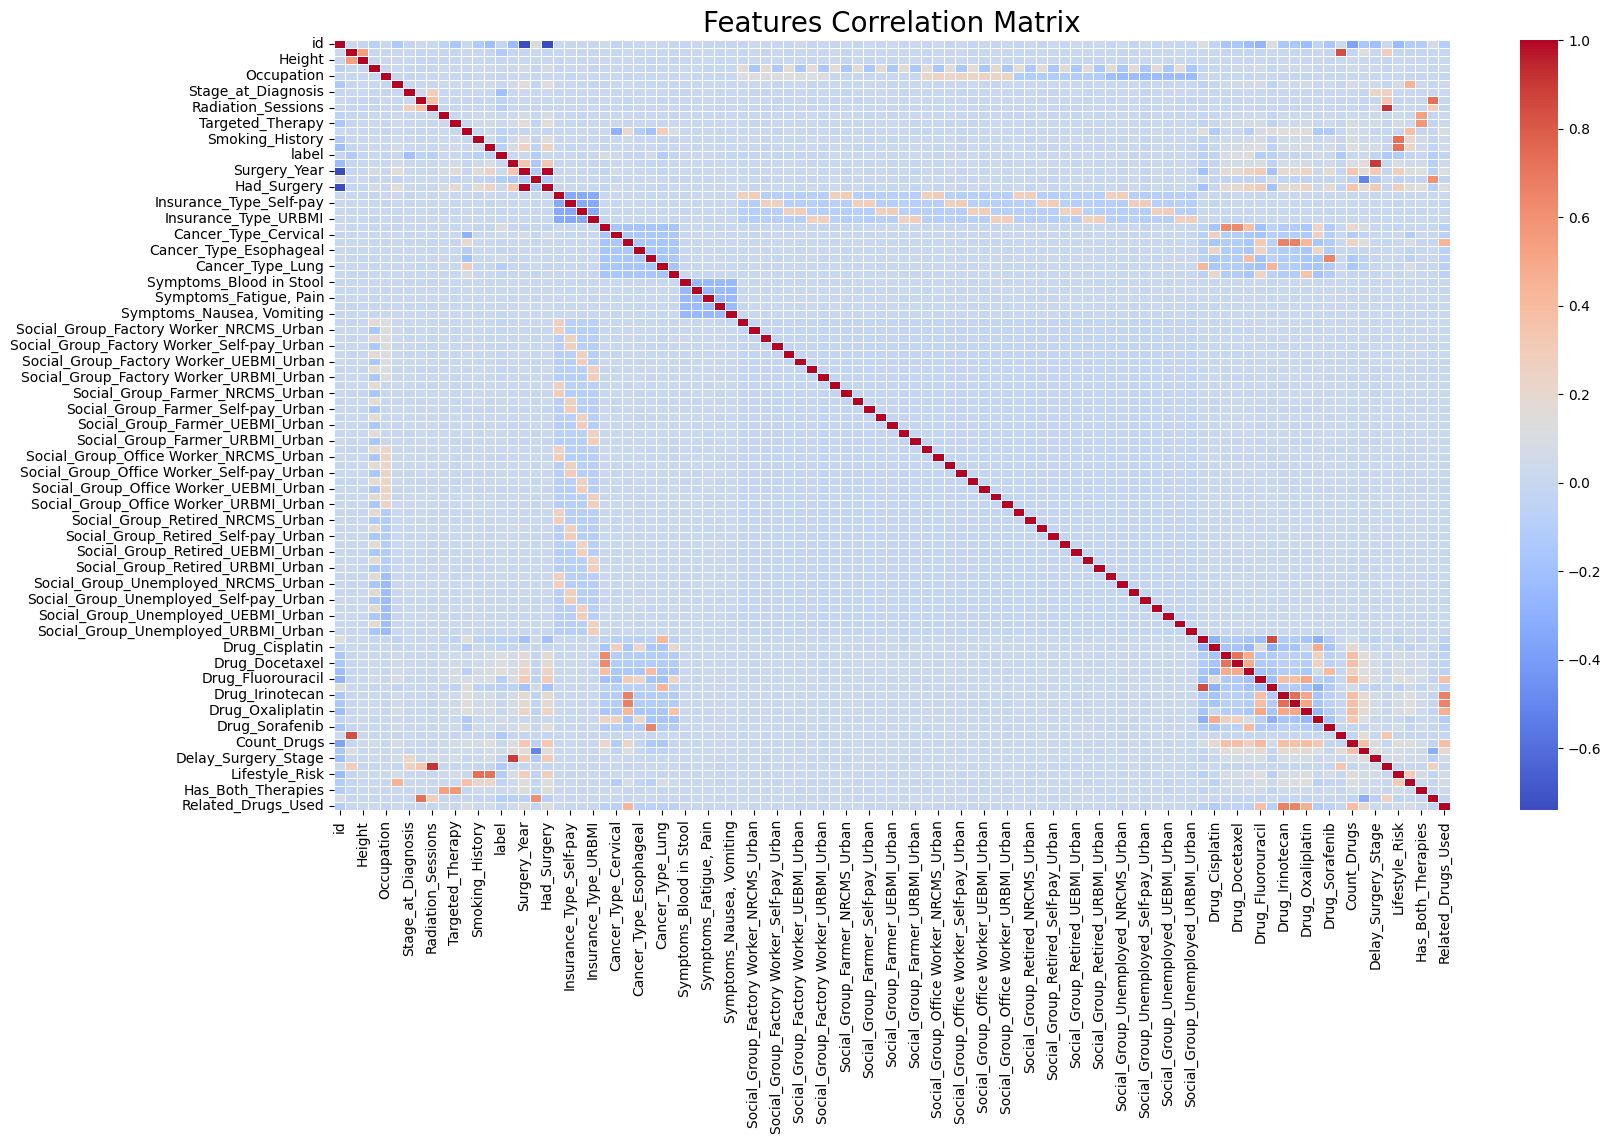

In [25]:
# Build the correlation matrix
corr_matrix = df.corr()

# Show and plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Features Correlation Matrix", fontsize=20)
plt.show()

In [26]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold for correlation
threshold = 0.90

# Keep track of columns to drop
to_drop = set()

# List of columns in the correlation matrix
columns = corr_matrix.columns

# Delete the second column of the correlation matrix that have a high correlation with the first column
for i in range(len(columns)):
    if columns[i] in to_drop:
        continue
    for j in range(i + 1, len(columns)):
        if columns[j] in to_drop:
            continue
        if corr_matrix.iloc[i, j] > threshold:
            print(f"Columns {columns[i]} and {columns[j]} are highly correlated with a correlation of {corr_matrix.iloc[i, j]:.2f}")
            to_drop.add(columns[j])

# Drop the selected columns from the dataframe
df = df.drop(columns=list(to_drop))

Columns Radiation_Sessions and BMI_Radiation_Interaction are highly correlated with a correlation of 0.91
Columns Surgery_Year and Had_Surgery are highly correlated with a correlation of 1.00


As our test data is in another CSV file, we have to do all of these previous preproccesing and feature extracting for the test file too, after reading the test data into another Pandas datrame.

In [27]:
# Load the CSV file into a dataframe
df_test = pd.read_csv("test_data.csv")

In [28]:
# Convert the date columns to datetime format
df_test["Birth_Date"] = pd.to_datetime(df_test["Birth_Date"], errors='coerce')
df_test["Diagnosis_Date"] = pd.to_datetime(df_test["Diagnosis_Date"], errors='coerce')
df_test["Surgery_Date"] = pd.to_datetime(df_test["Surgery_Date"], errors='coerce')

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4467 non-null   int64         
 1   Birth_Date          4454 non-null   datetime64[ns]
 2   Weight              4467 non-null   float64       
 3   Height              4467 non-null   object        
 4   Urban_Rural         4467 non-null   object        
 5   Occupation          4467 non-null   object        
 6   Insurance_Type      4467 non-null   object        
 7   Family_History      4467 non-null   object        
 8   Cancer_Type         4467 non-null   object        
 9   Stage_at_Diagnosis  4467 non-null   object        
 10  Diagnosis_Date      4467 non-null   datetime64[ns]
 11  Symptoms            4467 non-null   object        
 12  Tumor_Size          4467 non-null   float64       
 13  Surgery_Date        4467 non-null   datetime64[n

In [30]:
# Fill NaN values in the "Birth_Date" column with an outlier value
df_test["Birth_Date"] = df_test["Birth_Date"].fillna(pd.Timestamp("1700-01-01"))
df_test["Birth_Date"] = pd.to_datetime(df_test["Birth_Date"], errors='coerce')

# Fill NaN values in the "Symptoms" column with an empty string
df_test["Symptoms"] = df_test["Symptoms"].fillna("")

# Fill NaN values in the "Chemotherapy_Drugs" column with an empty string
df_test["Chemotherapy_Drugs"] = df_test["Chemotherapy_Drugs"].fillna("")

# Create a new column and calculate the weeks from diagnosis to surgery
df_test["Weeks_Diagnosis_To_Surgery"] = np.where(
    df_test["Surgery_Date"].notna(),
    (df_test["Surgery_Date"] - df_test["Diagnosis_Date"]).dt.days // 7,
    -1 
).astype(int)

# Create a new column and calculate the year from of surgery
df_test["Surgery_Year"] = np.where(
    df_test["Surgery_Date"].notna(),
    df_test["Surgery_Date"].dt.year,
    -1 
).astype(int)

# Create a new column and calculate the age at diagnosis
df_test["Age_At_Diagnosis"] = -1
df_test.loc[(df_test["Birth_Date"].dt.year != 1700), "Age_At_Diagnosis"] = (
    (df_test.loc[(df_test["Birth_Date"].dt.year != 1700), "Diagnosis_Date"] - df_test.loc[(df_test["Birth_Date"].dt.year != 1700), "Birth_Date"]).dt.days // 365
)

# Delete the "Surgery_Date" column
df_test = df_test.drop(columns=["Surgery_Date"])

# Create a new column to indicate if the patient had surgery
df_test["Had_Surgery"] = (df_test["Weeks_Diagnosis_To_Surgery"] != -1).astype(int)

# Delete the "Birth_Date" and "Diagnosis_Date" columns
df_test = df_test.drop(columns=["Birth_Date"])
df_test = df_test.drop(columns=["Diagnosis_Date"])

# Create a new column for patient's social group before encoding
df_test["Social_Group"] = df_test["Occupation"] + "_" + df_test["Insurance_Type"] + "_" + df_test["Urban_Rural"]

# Encode binary and ordinal categorical columns manually
df_test["Urban_Rural"] = df_test["Urban_Rural"].map({"Urban": 0, "Rural": 1})
df_test["Family_History"] = df_test["Family_History"].map({"No": 0, "Yes": 1})
df_test["Immunotherapy"] = df_test["Immunotherapy"].map({"No": 0, "Yes": 1})
df_test["Targeted_Therapy"] = df_test["Targeted_Therapy"].map({"No": 0, "Yes": 1})
df_test["Recurrence_Status"] = df_test["Recurrence_Status"].map({"NO": 0, "Yes": 1})

df_test["Smoking_History"] = df_test["Smoking_History"].map({"Never": 0, "Former": 1, "Current": 2})
df_test["Alcohol_Use"] = df_test["Alcohol_Use"].map({"Never": 0, "Occasional": 1, "Regular": 2})

df_test["Stage_at_Diagnosis"] = df_test["Stage_at_Diagnosis"].map({"I": 1, "II": 2, "III": 3, "IV": 4})

df_test["Occupation"] = df_test["Occupation"].map({"Unemployed": 0, "Retired": 1, "Farmer": 2, "Factory Worker": 3, "Office Worker": 4})

# Endcode other categorical columns using one-hot encoding
df_test = pd.get_dummies(df_test, columns=["Insurance_Type", "Cancer_Type", "Symptoms", "Social_Group"])
df_test[df_test.select_dtypes("bool").columns] = df_test.select_dtypes("bool").astype(int)

# Drop the emplty Symptoms column
try:
    df_test = df_test.drop(columns=["Symptoms_"])
except:
    pass

all_drugs = set()

# Extract all unique drugs from the "Chemotherapy_Drugs" column
for entry in df_test["Chemotherapy_Drugs"]:
    drugs = [d.strip() for d in entry.split(",") if d.strip()]
    all_drugs.update(drugs)

# Sort the unique drugs
all_drugs = sorted(all_drugs)

# Create new columns for each drug and set their values based on the presence of the drug in the "Chemotherapy_Drugs" column
for drug in all_drugs:
    df_test[f"Drug_{drug}"] = df_test["Chemotherapy_Drugs"].apply(lambda x: int(drug in x))

# Drop the original "Chemotherapy_Drugs" column
df_test = df_test.drop(columns=["Chemotherapy_Drugs"])

# Delete the additional word 'cm' in the "Height" column
df_test["Height"] = df_test["Height"].str.replace("cm", "").str.strip().astype(float)

# Compute the BMI
df_test["BMI"] = (df_test["Weight"] / ((df_test["Height"] / 100) ** 2)).round(1)

# Make "Height" and "Weight" columns to int type
df_test["Height"] = df_test["Height"].astype(int)
df_test["Weight"] = df_test["Weight"].astype(int)

# Create the count of drugs each patient used
drugs = [col for col in df_test.columns if col.startswith("Drug_")]
df_test["Count_Drugs"] = df_test[drugs].sum(axis=1)

# Create the column for number of drugs beside fitness
df_test["BMI_Age_Drug_Ratio"] = np.where(
    df_test["Age_At_Diagnosis"] != -1,
    ((df_test["BMI"] / df_test["Age_At_Diagnosis"]) * df_test["Count_Drugs"]),
    -1
).astype(int)

# Create the delay to surgery beside the stage level
df_test["Delay_Surgery_Stage"] = np.where(
    df_test["Weeks_Diagnosis_To_Surgery"] != -1,
    (df_test["Stage_at_Diagnosis"] * df_test["Weeks_Diagnosis_To_Surgery"]),
    -1
)

# Create the column for interaction between BMI and count of radiation sessions
df_test["BMI_Radiation_Interaction"] = df_test["BMI"] * df_test["Radiation_Sessions"]

# Create the column for patient's lifestyle based on smoking and alcohol used
df_test["Lifestyle_Risk"] = df_test[["Smoking_History", "Alcohol_Use"]].sum(axis=1)

# Create the risk based on patient's history
df_test["High_Risk_Group"] = (
    (df_test["Recurrence_Status"] == 1) &
    (df_test["Lifestyle_Risk"] >= 2) &
    (df["Family_History"] == 1)
).astype(int)

# Create the column for patient's lifestyle based on smoking and alchohol used
df_test["Has_Both_Therapies"] = ((df_test["Immunotherapy"] == 1) & (df_test["Targeted_Therapy"] == 1)).astype(int)

# Create the column for age and tumor size interaction
df_test["Age_Tumor_Size"] = np.where(
    df_test["Age_At_Diagnosis"] != -1,
    (df_test["Age_At_Diagnosis"] * df_test["Tumor_Size"]),
    -1
).astype(int)

# Create the column for using related drugs for each cancer type
df_test["Related_Drugs_Used"] = df_test.apply(check_appropriate_treatment, axis=1)

# Scale and standardize the features
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Check and delete columns in train data that doesn't exist in the test data and vice verca
for feature in df.columns:
    if (feature not in df_test.columns) and (feature != "label"):
        df = df.drop(columns=[f"{feature}"])
for feature in df_test.columns:
    if feature not in df.columns:
        df_test = df_test.drop(columns=[f"{feature}"])

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          4467 non-null   int64  
 1   Weight                                      4467 non-null   float64
 2   Height                                      4467 non-null   float64
 3   Urban_Rural                                 4467 non-null   int64  
 4   Occupation                                  4467 non-null   int64  
 5   Family_History                              4467 non-null   int64  
 6   Stage_at_Diagnosis                          4467 non-null   int64  
 7   Tumor_Size                                  4467 non-null   float64
 8   Radiation_Sessions                          4467 non-null   float64
 9   Immunotherapy                               4467 non-null   int64  
 10  Targeted_The

Finally, we use some models to get and compare their accuracies and choose the best one for this classification. Models like:

- **Logistic Regression**

- **Decision Tree**

- **Random Forest**

- **Adaptive Boosting**

- **Gaussian Naive Bayes**

- **XGBoost**

- **CatBoost**

At the end, we show the best model with its accuracy and save its predictions into the `classification_predictions.csv` file.

In [32]:
# Building train and test data and lables
X = df.drop(columns=["label", "id"])
Y = df["label"]
X_test = df_test.drop(columns=["id"])
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Apply cross-validation
cv = StratifiedKFold(n_splits=3)

# Use models and their hyper parameters
models = {
    "Logistic Regression": (LogisticRegression(), {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear'],
        'max_iter': [1000]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4]
    }),
    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }),
    "Gaussian NB": (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }),
    "XGBoost": (XGBClassifier(eval_metric="logloss"), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 1],
        'subsample': [0.8],
        'colsample_bytree': [0.8]
    }),
    "CatBoost": (CatBoostClassifier(verbose=0), {
        'iterations': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'depth': [4, 6, 8]
    })
}

# Run all models using Grid search
best_accuracy = 0
best_model_name = None
best_model = None
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=cv, n_jobs=-1)
    grid.fit(X_train, Y_train)
    preds = grid.predict(X_val)
    acc = accuracy_score(Y_val, preds)

    print(f"The model {name} has the accuracy {(acc * 100):.3f}%")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model = grid.best_estimator_

    new_result = pd.DataFrame([{
        "Model": name,
        "Accuracy": f"{(acc * 100):.3f}%",
        "Precision": f"{(precision_score(Y_val, preds) * 100):.3f}%",
        "Recall": f"{(recall_score(Y_val, preds) * 100):.3f}%",
        "F1-Score": f"{(f1_score(Y_val, preds) * 100):.3f}%"
    }])
    results = pd.concat([results, new_result], ignore_index=True)

# Show the best model with its accuracy
print(f"\nThe best model is {best_model_name} with accuracy: {(best_accuracy * 100):.3f}%")

# Train the best model on the total train data
best_model.fit(X_train, Y_train)

# Predict labels on the test data
y_pred = best_model.predict(X_test)

# Create the result dataframe
result = pd.DataFrame({"id": df_test["id"], "label": y_pred})

# Load the test results into a CSV file
result.to_csv("classification_predictions.csv", index=False)

The model Logistic Regression has the accuracy 65.628%
The model Decision Tree has the accuracy 78.508%
The model Random Forest has the accuracy 79.433%
The model AdaBoost has the accuracy 75.260%
The model Gaussian NB has the accuracy 64.570%
The model XGBoost has the accuracy 80.076%
The model CatBoost has the accuracy 80.378%

The best model is CatBoost with accuracy: 80.378%


Then we calculate and report Accuracy, Precision, Recall, and F1-Score during our model development process on the train data.

- **Accuracy** -> The percentage of correct predictions out of all predictions.

$$ Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN} \times 100 $$

- **Precision** -> The percentage of positive predictions that are actually correct. It is about how reliable the positive predictions are.

$$ Precision = \dfrac{TP}{TP + FP} \times 100 $$

- **Recall** -> The percentage of actual positives that are correctly identified. It is about how many actual positives the model successfully captures.

$$ Recall = \dfrac{TP}{TP + FN} \times 100 $$

- **F1-Score** -> The harmonic mean of Precision and Recall. It is useful when we want a balance between Precision and Recall, especially with imbalanced data.

$$ F1 Score = 2 \times \dfrac{Precision \times Recall}{Precision + Recall} $$

Where *TP* is true positive, *TN* is true negative, *FP* is false positive and *FN* is false negative.

In [33]:
# Show the model results for the train data
def highlight_best(row):
    return ["background-color: red" if row["Model"] == best_model_name else "" for _ in row]

colored_results = results.style.apply(highlight_best, axis=1)

colored_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,65.628%,64.862%,63.802%,64.328%
1,Decision Tree,78.508%,77.662%,78.266%,77.963%
2,Random Forest,79.433%,78.841%,78.810%,78.826%
3,AdaBoost,75.260%,74.882%,73.834%,74.354%
4,Gaussian NB,64.570%,64.251%,61.003%,62.585%
5,XGBoost,80.076%,79.365%,79.705%,79.534%
6,CatBoost,80.378%,79.721%,79.938%,79.829%
